In [1]:
! ls *.laz

AK_Juneau_2012_000021.laz


In [2]:
input_laz_path = 'AK_Juneau_2012_000021.laz'
output_las_path = 'AK_Juneau_2012_000021.las'

In [5]:
#! pip install --user pylas[lazrs,laszip]

     |████████████████████████████████| 921 kB 6.1 MB/s eta 0:00:01
  Created wheel for pylas: filename=pylas-0.4.3-py3-none-any.whl size=40354 sha256=ae4d4320ac4ad3a3556c5b4a6d4b4c7fce99d8136b075bb02258286b9eb1745a
  Stored in directory: /home/jovyan/.cache/pip/wheels/b2/af/a6/c8c7ce1b3dc27174d5524f6c9cca5df59974caca07534d4408
Successfully built pylas


In [6]:
import pylas
laz = pylas.read(input_laz_path)

In [7]:
las = pylas.convert(laz)

In [8]:
las.write(output_las_path)

In [10]:
!ls -lh *.las

-rw-r--r-- 1 jovyan 40006 13M Dec  8 15:20 AK_Juneau_2012_000021.las


In [11]:
!ls -lh *.laz

-rw-r--r-- 1 jovyan 40006 1.6M Dec 19  2019 AK_Juneau_2012_000021.laz


# QGIS 3.18 has point cloud support

# but the help desk installed QGIS 3.16 :-(

In [ ]:
# import rasterio
# from rasterio.features import shapes
# import numpy as np
# from shapely.geometry import Polygon
# mask = None
# with rasterio.Env():
#  with rasterio.open(‘SlopeNew.tif’) as src:
#  image = src.read(1) # first band
#  results = (
#  {‘properties’: {‘raster_val’: v}, ‘geometry’: s}
#  for i, (s, v)
#  in enumerate(
#  shapes(image.astype(np.float32), mask=mask, 
# transform=src.transform)))
#  geoms = list(results)

In [14]:
def return_xyzc(point):
 x = point[0]
 y = point[1]
 z = point[2]
 c = point[5]
 return [x, y, z , c]

input_las_path="AK_Juneau_2012_000021.las"
pcloud = pylas.read(input_las_path)
points = [return_xyzc(i) for i in pcloud]
building_pts = [point for point in points if point[3] == 6]

In [16]:
building_pts

[]

In [31]:
! pip install --user open3d
#!pip uninstall -y open3d

# FAIL2 ! pip install --user open3d-python

  Using cached open3d-0.14.1-cp37-cp37m-manylinux_2_27_x86_64.whl (395.5 MB)


In [36]:
import numpy as np
#from open3d import * 
import open3d
#from open3d import read_point_cloud

def las_test(las_file):
    cloud = open3d.io.read_point_cloud(las_file,print_progress=True) # Read the point cloud
    open3d.visualization.draw_geometries([cloud]) # Visualize the point cloud     


In [37]:
las_test('AK_Juneau_2012_000021.las')

[Open3D WARNING] Read geometry::PointCloud failed: unknown file extension for AK_Juneau_2012_000021.las (format: auto).
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [38]:
from open3d import JVisualizer


ImportError: cannot import name 'JVisualizer' from 'open3d' (/home/jovyan/.local/lib/python3.7/site-packages/open3d/__init__.py)

https://github.com/maartenbreddels/ipyvolume/blob/master/notebooks/demo-0.4.ipynb

https://heremaps.github.io/pptk/tutorials/viewer/tanks_and_temples.html

https://stackoverflow.com/questions/50965673/python-display-3d-point-cloud

In [40]:
#! pip install --user pptk

     |████████████████████████████████| 24.8 MB 7.0 MB/s eta 0:00:011     |████████████████████████        | 18.6 MB 11.4 MB/s eta 0:00:01


In [42]:
# fail fail
# import pptk
# import numpy as np
# P = np.random.rand(100,3)
# v = pptk.viewer(P)

KeyboardInterrupt: 

In [43]:
!wget https://people.sc.fsu.edu/~jburkardt/data/ply/airplane.ply

--2021-12-08 16:04:11--  https://people.sc.fsu.edu/~jburkardt/data/ply/airplane.ply
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.16.102
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.16.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74547 (73K)
Saving to: ‘airplane.ply’

airplane.ply        100%[===================>]  72.80K   379KB/s    in 0.2s    

2021-12-08 16:04:12 (379 KB/s) - ‘airplane.ply’ saved [74547/74547]



In [46]:
! pip install --user pyntcloud

     |████████████████████████████████| 346 kB 3.9 MB/s eta 0:00:01


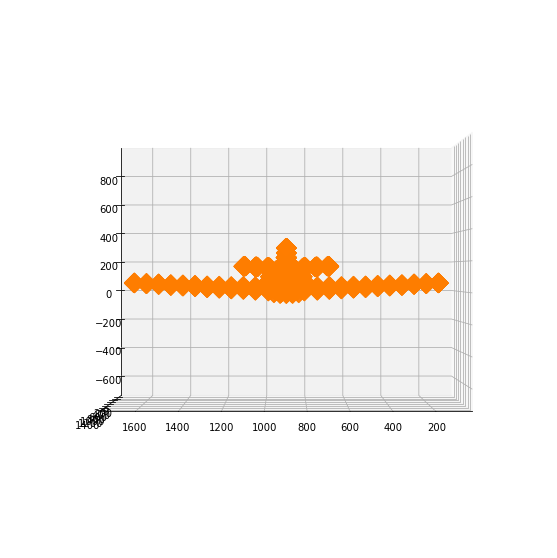

In [47]:
from pyntcloud import PyntCloud

human_face = PyntCloud.from_file("airplane.ply")

human_face.plot()

![airplane](https://people.sc.fsu.edu/~jburkardt/data/ply/airplane.png)

In [51]:
#!pip install --user plyfile

In [53]:
import plyfile
data = plyfile.PlyData.read('airplane.ply')['vertex']
data

PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float')), count=1335, comments=[])

In [54]:
# # FAIL AGAIN pptk
# #Use per-vertex attributes to make numpy arrays xyz, rgb, and n.

# xyz = np.c_[data['x'], data['y'], data['z']]
# #rgb = np.c_[data['red'], data['green'], data['blue']]
# #n = np.c_[data['nx'], data['ny'], data['nz']]

# #Visualize.

# v = pptk.viewer(xyz)
# #v.attributes(rgb / 255., 0.5 * (1 + n))

KeyboardInterrupt: 

In [55]:
pcread()

NameError: name 'pcread' is not defined

Loading channels: done
No match found for: pcread. Search: *pcread*

PackagesNotFoundError: The following packages are not available from current channels:

  - pcread

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [58]:
ply_file='airplane.ply'

In [60]:
las_test(ply_file)

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


https://colab.research.google.com/drive/1CR_HDvJ2AnjJV3Bf5vwP70K0hx3RcdMb?usp=sharing#scrollTo=AAe7DdprqEO4